
---

<center><h1>SQUAD RAPIDMINER</h1></center>

---

*  Jessica López 
*  Sergio Salvador 
*  Francisco Ávila

# Import libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import json
import warnings
warnings.filterwarnings("ignore")

# Function to get data

In [ ]:
# Se define una lista con las etiquetas de las clases
labels = ['PNEUMONIA', 'NORMAL']

# Se define un tamaño de imagen para todas las imágenes
img_size = 224

# Se define la función para obtener los datos de las imágenes
def get_data(data_dir):
    data = [] # lista vacía para almacenar los datos
    for label in labels: # se itera sobre cada una de las etiquetas de las clases
        path = os.path.join(data_dir, label) # se obtiene la ruta de la carpeta correspondiente a la etiqueta de la clase
        class_num = labels.index(label) # se obtiene el índice de la clase actual en la lista de etiquetas
        for img in os.listdir(path): # se itera sobre cada imagen dentro de la carpeta correspondiente a la clase
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # se carga la imagen en escala de grises
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # se redimensiona la imagen a un tamaño deseado
                data.append([resized_arr, class_num]) # se agrega la imagen y su etiqueta correspondiente a la lista de datos
            except Exception as e:
                print(e) # si ocurre un error al cargar una imagen, se imprime el error en la consola
    return np.array(data) # se devuelve la lista de datos como un array de numpy


In [5]:
train = get_data('C:/Users/favil/MDS/DeepLearning/proyecto/datasets/train')
test = get_data('C:/Users/favil/MDS/DeepLearning/proyecto/datasets/test')

## Show the distribution 

In [119]:
def distr(set_fotos, set_name):
    l = []
    for i in set_fotos:
        if(i[1] == 0):
            l.append("Pneumonia")
        else:
            l.append("Normal")
    sns.set_style('dark')
    sns.countplot(l, palette=['#F08080', '#6495ED']).set(title=f'{set_name.capitalize()} Distribution')
    sns.set(font_scale=1)


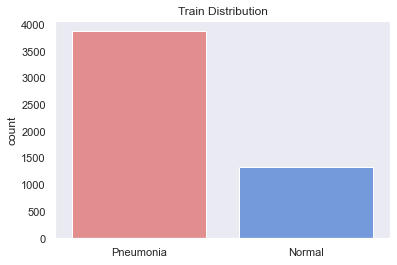

In [120]:
distr(train, 'Train')

# Function to duplicate data

In [11]:
def generate_augmented_images(data_path, output_folder, images_increased, width_shape=224, height_shape=244):    
    
    try:
        os.mkdir(output_folder) # Se crea la carpeta si aún no existe.
    except:
        print("")

    # Se configura el objeto ImageDataGenerator para aplicar las transformaciones a las imágenes.
    train_datagen = ImageDataGenerator(
        rotation_range=20, # Rango de rotación aleatorio de 0 a 20 grados.
        zoom_range=0.2, # Rango de zoom aleatorio de 0 a 0.2.
        width_shift_range=0.1, # Desplazamiento horizontal aleatorio de 0 a 0.1.
        height_shift_range=0.1, # Desplazamiento vertical aleatorio de 0 a 0.1.
        horizontal_flip=True, # Volteo horizontal aleatorio.
        vertical_flip=False) # Sin volteo vertical.
    
    # Se especifica la ruta de la carpeta que contiene las imágenes originales.
    data_dir_list= os.listdir(data_path)

    # Se inicializan las variables del loop que genera las imágenes aumentadas.
    i = 0  # contador de imágenes
    num_images = 0  # contador de imágenes generadas

    # Recorremos la lista de archivos de imágenes en el directorio de datos
    for image_file in data_dir_list:
        img_list = os.listdir(data_path)  # lista de imágenes
        img_path = data_path + '/' + image_file  # ruta de la imagen actual
        imge = load_img(img_path)  # cargamos la imagen con la librería keras

        # Redimensionamos la imagen a la forma especificada y la convertimos a un array
        imge = cv2.resize(img_to_array(imge), (width_shape, height_shape), interpolation=cv2.INTER_AREA)

        # Normalizamos el valor de los píxeles de la imagen entre 0 y 1 y añadimos una dimensión extra para el batch
        x = imge / 255
        x = np.expand_dims(x, axis=0)

        # Aumentamos las imágenes de la imagen actual con el objeto train_datagen
        t = 1
        for output_batch in train_datagen.flow(x, batch_size=1):
            # Convertimos el batch de imágenes generado a un array
            a = img_to_array(output_batch[0])

            # Desnormalizamos los píxeles y convertimos el array en una imagen RGB
            imagen = output_batch[0, :, :] * 255
            imgfinal = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

            # Guardamos la imagen aumentada en una carpeta especificada
            cv2.imwrite(output_folder + "/%i%i.jpg" % (i, t), imgfinal)
            t += 1

            # Aumentamos el contador de imágenes generadas y detenemos el bucle si se ha alcanzado el número deseado
            num_images += 1
            if t > images_increased:
                break

        # Aumentamos el contador de imágenes
        i += 1

    # Mostramos el número total de imágenes generadas
    print("images generated", num_images)

In [12]:
generate_augmented_images('C:/Users/favil/MDS/DeepLearning/proyecto/datasets/train/NORMAL', 'NORMAL', 5)

KeyboardInterrupt: 

In [ ]:
generate_augmented_images('C:/Users/favil/MDS/DeepLearning/proyecto/datasets/train/PENUMONIA', 'PNEUMONIA', 2)

# Balanced data

In [13]:
train_2= get_data('C:/Users/favil/MDS/DeepLearning/proyecto/datasets/TRAIN_2')

## Show the new distribution

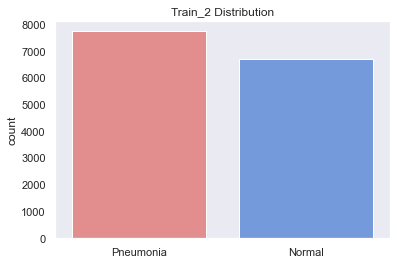

In [121]:
distr(train_2, 'Train_2')

# Image display

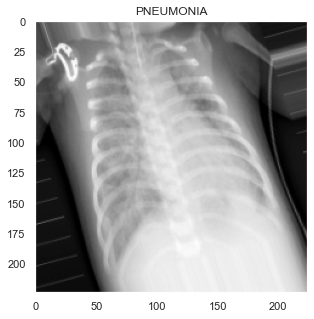

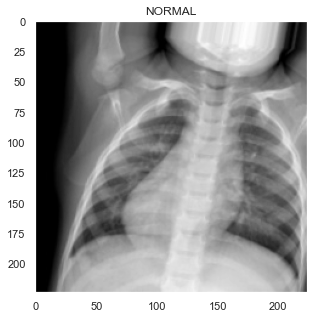

In [21]:
plt.figure(figsize = (5,5))
plt.imshow(train_2[0][0], cmap='gray')
plt.title(labels[train_2[0][1]])
plt.grid(None) 
plt.figure(figsize = (5,5))
plt.imshow(train_2[-1][0], cmap='gray')
plt.title(labels[train_2[-1][1]])
plt.grid(None) 
plt.show()

# Data split

In [22]:
x_train= []
y_train= []

x_test= []
y_test= []

for k,v in train_2:
    x_train.append(k)
    y_train.append(v)
    
for k,v in test:
    x_test.append(k)
    y_test.append(v)

In [26]:
print('Hay:', len(x_train), 'elementos en x_train')
print('Hay:', len(y_train), 'elementos en y_train')
print('Hay:', len(x_test),  'elementos en x_test')
print('Hay:', len(y_test),  'elementos en y_test')

Hay: 14455 elementos en x_train
Hay: 14455 elementos en y_train
Hay: 624 elementos en x_test
Hay: 624 elementos en y_test


# Data normalization

In [27]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

# Reshape

In [28]:
x_train = x_train.reshape(14455, 224, 224, 1)
y_train = np.array(y_train)


x_test = x_test.reshape(624, 224, 224, 1)
y_test = np.array(y_test)

# Apllying diferentes models

 ## Model A

### Neural network architecture

In [31]:
model= Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

### Compile the model

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["Accuracy", "Recall", "Precision", "FalseNegatives"])

### Fit the model

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(x_test, y_test))

#### Metrics

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")
print("Recall of the model is - " , model.evaluate(x_test,y_test)[2]*100 , "%")
print("Precision of the model is - " , model.evaluate(x_test,y_test)[3]*100 , "%")
print("False Negative of the model is - " , model.evaluate(x_test,y_test)[4] , "%")

#### Save the model 

In [ ]:
model.save('modelo_metricas.h5')

#### Get the dictionary containing each metric and the loss for each epoch and save it as a json

In [ ]:
history_dict = history.history

json.dump(history_dict, open('json_history', 'w'))

history_dict = json.load(open('json_history', 'r'))


 ## Model B

### Neural network architecture

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model_1.add(MaxPool2D((2,2)))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(MaxPool2D((2,2)))
model_1.add(Conv2D(64,(3,3),activation='relu'))
model_1.add(MaxPool2D(2,2))
model_1.add(Conv2D(128,(3,3),activation='relu'))
model_1.add(MaxPool2D(2,2))
model_1.add(Conv2D(256,(3,3),activation='relu'))
model_1.add(MaxPool2D(2,2))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model.summary()

### Compile the model

In [ ]:
model_1.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["Accuracy", "Recall", "Precision", "FalseNegatives"])

### Fit the model 

In [ ]:
history_sgd= model_1.fit(x_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(x_test, y_test))

#### Metrics

In [ ]:
print("Loss of the model is - " , model_1.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_1.evaluate(x_test,y_test)[1]*100 , "%")
print("Recall of the model is - " , model_1.evaluate(x_test,y_test)[2]*100 , "%")
print("Precision of the model is - " , model_1.evaluate(x_test,y_test)[3]*100 , "%")
print("False Negative of the model is - " , model_1.evaluate(x_test,y_test)[4] , "%")

#### Save the model

In [ ]:
model_1.save('modelo_sgd.h5')

#### Get the dictionary containing each metric and the loss for each epoch and save it as a json

In [ ]:
history_dict_sgd = history_sgd.history

json.dump(history_dict_sgd, open('json_history_sgd', 'w'))

history_dict_sgd= json.load(open('json_history_sgd', 'r'))

## Model C

### Neural network architecture

In [37]:
model_2 = Sequential()
model_2.add(Conv2D(16, (3, 3), activation='tanh', input_shape=(224, 224, 1)))
model_2.add(MaxPool2D((2,2)))
model_2.add(Conv2D(32, (3, 3), activation='tanh'))
model_2.add(MaxPool2D((2,2)))
model_2.add(Conv2D(64,(3,3),activation='tanh'))
model_2.add(MaxPool2D(2,2))
model_2.add(Conv2D(128,(3,3),activation='tanh'))
model_2.add(MaxPool2D(2,2))
model_2.add(Conv2D(256,(3,3),activation='tanh'))
model_2.add(MaxPool2D(2,2))
model_2.add(Flatten())
model_2.add(Dense(128, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

### Compile the model

In [ ]:
model_2.compile(loss="binary_crossentropy", optimizer="adam",metrics=["Accuracy", "Recall", "Precision", "FalseNegatives"])

### Fit the model

In [ ]:
history_tanh = model_2.fit(x_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(x_test, y_test))

#### Metrics

In [ ]:
print("Loss of the model is - " , model_2.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_2.evaluate(x_test,y_test)[1]*100 , "%")
print("Recall of the model is - " , model_2.evaluate(x_test,y_test)[2]*100 , "%")
print("Precision of the model is - " , model_2.evaluate(x_test,y_test)[3]*100 , "%")
print("False Negative of the model is - " , model_2.evaluate(x_test,y_test)[4] , "%")

#### Save the model

In [ ]:
model_1.save('modelo_tanh.h5')

### Get the dictionary containing each metric and the loss for each epoch and save it as a json

In [ ]:
history_dict_tanh = history_tanh.history

json.dump(history_dict_tanh, open('json_history', 'w'))

history_dict_tanh = json.load(open('json_history', 'r'))

# Graphics

In [72]:
def plotear(diccionario, metrica, val_metrica, nombre_metrica):
    metrica_ = metrica
    val_metrica_ = val_metrica
    epochs = range(len(metrica))
    plt.plot(epochs, metrica_, '--', label='Training')
    plt.plot(epochs, val_metrica_ , 'g', label='Validation')
    plt.title(f'Training and validation {nombre_metrica}')
    plt.legend()
    plt.show()

## Model A

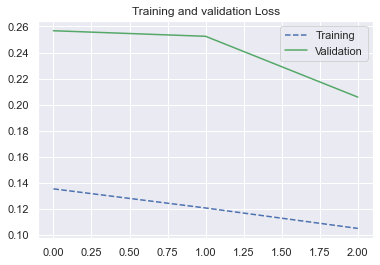

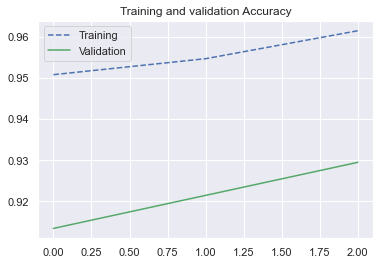

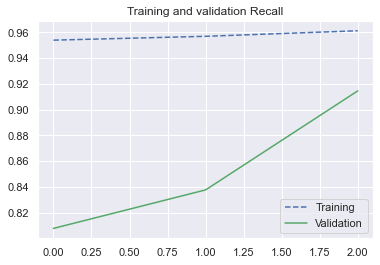

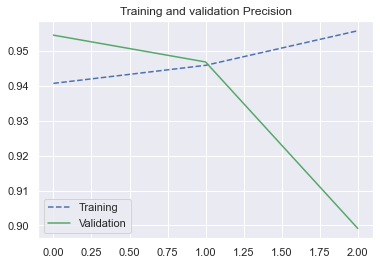

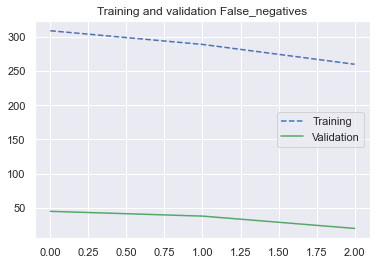

In [77]:
plotear(history_dict, history_dict['loss'], history_dict['val_loss'], 'Loss')

plotear(history_dict, history_dict['Accuracy'], history_dict['val_Accuracy'], 'Accuracy')

plotear(history_dict, history_dict['recall'], history_dict['val_recall'], 'Recall')

plotear(history_dict, history_dict['precision'], history_dict['val_precision'], 'Precision')

plotear(history_dict, history_dict['false_negatives'], history_dict['val_false_negatives'], 'False_negatives')

## Model B

In [ ]:
plotear(history_dict_sgd, history_dict_sgd['loss'], history_dict_sgd['val_loss'], 'Loss')

plotear(history_dict_sgd, history_dict_sgd['Accuracy'], history_dict_sgd['val_Accuracy'], 'Accuracy')

plotear(history_dict_sgd, history_dict_sgd['recall'], history_dict_sgd['val_recall'], 'Recall')

plotear(history_dict_sgd, history_dict_sgd['precision'], history_dict_sgd['val_precision'], 'Precision')

plotear(history_dict_sgd, history_dict_sgd['false_negatives'], history_dict_sgd['val_false_negatives'], 'False_negatives')

## Model C

In [ ]:
plotear(history_dict_tanh, history_dict_tanh['loss'], history_dict_tanh['val_loss'], 'Loss')

plotear(history_dict_tanh, history_dict_tanh['Accuracy'], history_dict_tanh['val_Accuracy'], 'Accuracy')

plotear(history_dict_tanh, history_dict_tanh['recall'], history_dict_tanh['val_recall'], 'Recall')

plotear(history_dict_tanh, history_dict_tanh['precision'], history_dict_tanh['val_precision'], 'Precision')

plotear(history_dict_tanh, history_dict_tanh['false_negatives'], history_dict_tanh['val_false_negatives'], 'False_negatives')